# Data Science - Ujian Akhir Semester
- Nama: Rahmat Zaki Muharom
- NIM: 19650079
- Kelas: Data Science - D

## Analisis & Model Regresi Linear Pada Data Menu Pizza (Visualisasi, EDA, & Prediksi Harga)

### IMPORT PACKAGES

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Statmodels
import statsmodels
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
print(matplotlib.__version__)

3.5.2


In [4]:
#!pip3 install matplotlib --upgrade

### LOAD DATASET

In [5]:
path = "gdrive/My Drive/Data Science 2022/Data/"

In [6]:
os.listdir(path)

['pizza_v2.csv', 'house_prices.csv']

In [7]:
df = pd.read_csv(path + "pizza_v2.csv")

In [8]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


**READ DATASET**
- company: nama restoran pizza
- price_rupiah: harga pizza
- diameter: ukuran diameter dari pizza dalam satuan inch
- topping: berbagai macam jenis topping pizza
- variant: berbagai variasi pizza
- size: berbagai macam ukuran pizza
- extra_sauce: tambahan extra saus pada pizza (ya / tidak)
- extra_cheese: tambahan extra keju pada pizza (ya / tidak)
- extra_mushrooms: tambahan extra jamur pada pizza (ya / tidak)


### PROBLEM STATEMENT

1. Berapa banyak jumlah company yang ada dari data pizza?
2. Berapa harga tertingi dan terendah dari data pizza?
3. Berapa diameter terbesar dan terkecil dari data pizza?
4. Berapa banyak jenis topping dari data pizza?
5. Berapa banyak jenis variant dari data pizza?
6. Berapa macam jenis ukuran dari data pizza?
7. Berapa banyak rasio perbandingan antara yang menggunakan & tidak menggunakan extra sauce?
8. Berapa banyak rasio perbandingan antara yang menggunakan & tidak menggunakan extra cheese?
9. Berapa banyak rasio perbandingan antara yang menggunakan & tidak menggunakan extra mushroom?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


###Pre-EDA Feature Engineering

In [10]:
df['price_rupiah'] = df['price_rupiah'].replace({'Rp': ''}, regex=True)
df['price_rupiah'] = df['price_rupiah'].replace({',000': '000'}, regex=True)
df['price_rupiah'] = df['price_rupiah'].replace({',500': '500'}, regex=True)
df['diameter'] = df['diameter'].replace({' inch': ''}, regex=True)

In [11]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18,mozzarella,double_signature,jumbo,yes,no,yes


In [12]:
df['price_rupiah'] = pd.to_numeric(df['price_rupiah'])
df['diameter'] = pd.to_numeric(df['diameter'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price_rupiah     129 non-null    int64  
 2   diameter         129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ KB


### EDA

####1. Jumlah Company
Berapa banyak jumlah company yang ada dari data pizza?

In [14]:
df['company'].nunique()

5

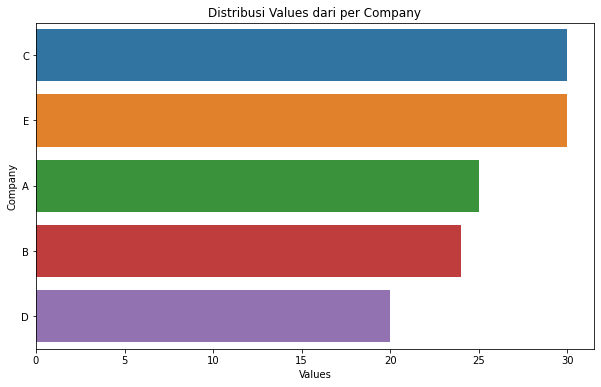

In [15]:
co = df['company'].value_counts()
dco = pd.DataFrame({'company':co.index, 'values':co.values})
sdco = dco.sort_values(by='values', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=sdco['values'], y=sdco['company'])
plt.xlabel("Values")
plt.ylabel("Company")
plt.title("Distribusi Values dari per Company");

<u> **Hasil** </u>:
<br>Jumlah company yang ada pada data menu pizza yakni sebanyak 5 company: A, B, C, D, & E. Dimana secara distribusi company C & E menempati posisi teratas untuk menu pizza yakni sebesar 30 menu. <br> Sedangkan untuk company D menjadi company terendah untuk menu pizza yakni hanya sebesar 20 menu.

####2. Harga pizza
Berapa harga tertinggi dan terendah dari data pizza?

In [16]:
H = df['price_rupiah'].value_counts()
pd.DataFrame({'harga':H.index, 'values':H.values})

,harga,values
0,72000,11
1,90000,8
2,46000,7
3,96000,5
4,83000,5
5,49000,5
6,75000,5
7,70000,4
8,110000,4
9,99000,4


In [17]:
Hmax = df['price_rupiah'].max()
Hmin = df['price_rupiah'].min()
Hprice = [df['price_rupiah'].max(), df['price_rupiah'].min()]
Hlabel = ['Harga Max', 'Harga Min']
Hdf = pd.DataFrame({'Label':Hlabel, 'Harga':Hprice})

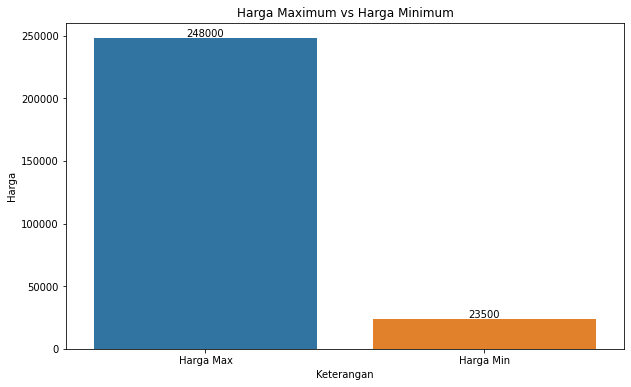

In [18]:
plt.figure(figsize=(10,6))
Hbp = sns.barplot(x=Hdf['Label'], y=Hdf['Harga'])
Hbp.bar_label(Hbp.containers[0])
plt.xlabel("Keterangan")
plt.ylabel("Harga")
plt.title("Harga Maximum vs Harga Minimum");

<u> **Hasil** </u>:
<br> Terdapat 43 macam harga pizza pada data yakni dari range antara Rp23500 sebagai harga minimum hingga Rp248000 sebagai harga maximum.

####3. Diameter pizza
Berapa diameter terbesar dan terkecil dari data pizza?



In [19]:
D = df['diameter'].value_counts()
pd.DataFrame({'diameter':D.index, 'values':D.values})

,diameter,values
0,12.0,49
1,14.0,24
2,8.5,22
3,17.0,10
4,18.5,6
5,16.0,5
6,8.0,4
7,16.5,4
8,22.0,3
9,20.0,1


In [20]:
Dmax = df['diameter'].max()
Dmin = df['diameter'].min()
Dmt = [df['diameter'].max(), df['diameter'].min()]
Dlabel = ['Diameter Max', 'Diameter Min']
Dfm = pd.DataFrame({'Label':Dlabel, 'Diameter':Dmt})

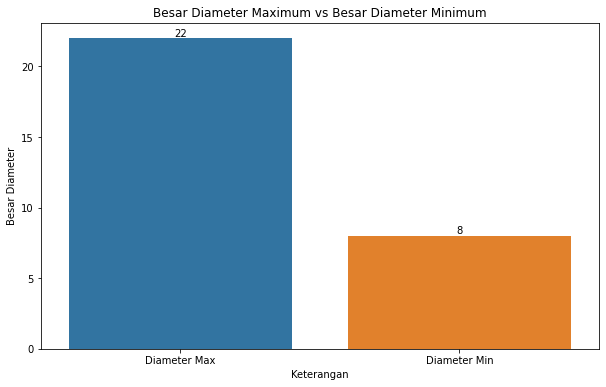

In [21]:
plt.figure(figsize=(10,6))
Dbp = sns.barplot(x=Dfm['Label'], y=Dfm['Diameter'])
Dbp.bar_label(Dbp.containers[0])
plt.xlabel("Keterangan")
plt.ylabel("Besar Diameter")
plt.title("Besar Diameter Maximum vs Besar Diameter Minimum");

<u> **Hasil** </u>:
<br> Terdapat 11 macam ukuran diameter pizza pada data yakni dari range 8 inch sebagai diameter terkecil hingga 22 inch sebagai diameter terbesar.

####4. Jenis topping pizza
Berapa banyak jenis topping dari data pizza?

In [22]:
df['topping'].nunique()

12

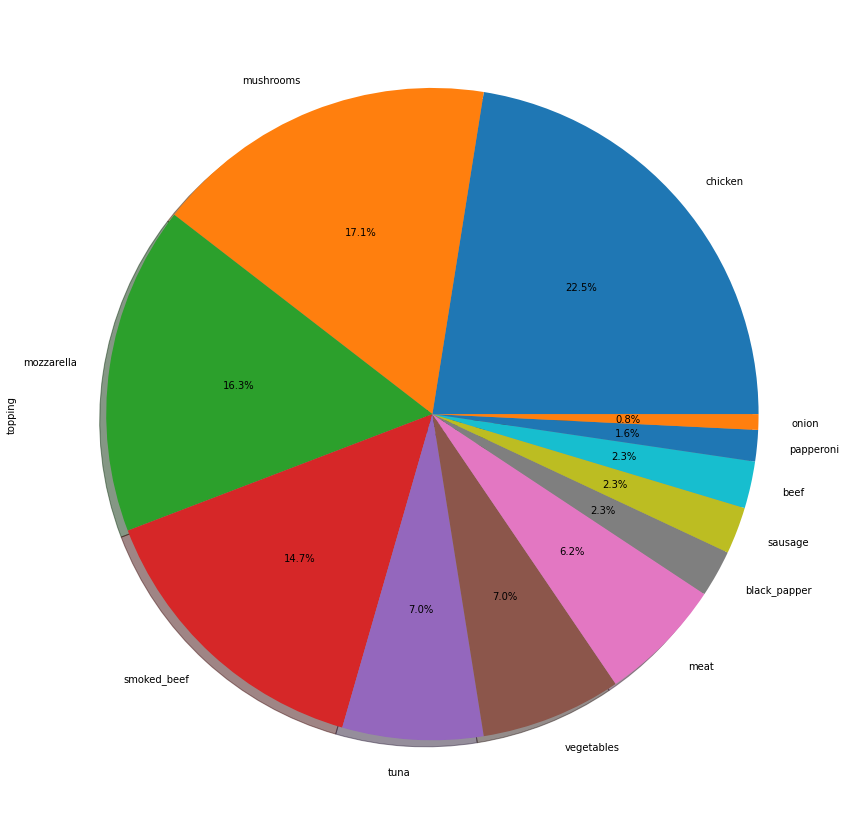

In [23]:
plt.figure(figsize=(20,15))
top = df['topping'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [24]:
T = df['topping'].value_counts()
pd.DataFrame({'topping':T.index, 'values':T.values})

,topping,values
0,chicken,29
1,mushrooms,22
2,mozzarella,21
3,smoked_beef,19
4,tuna,9
5,vegetables,9
6,meat,8
7,black_papper,3
8,sausage,3
9,beef,3


<u> **Hasil** </u>:
<br> Terdapat 12 macam topping pizza pada data. Dimana terdapat 4 macam topping terbanyak yakni chicken (22,5% - 29 menu), mushrooms (17,1% - 22 menu), mozzarella (16,3% - 21 menu), & smoked beef (14,7% - 19 menu). Dimana topping onion sebagai jenis topping tersedikit yakni hanya pada 1 menu.

####5. Jenis variant pizza
Berapa banyak jenis variant dari data pizza?

In [25]:
df['variant'].nunique()

20

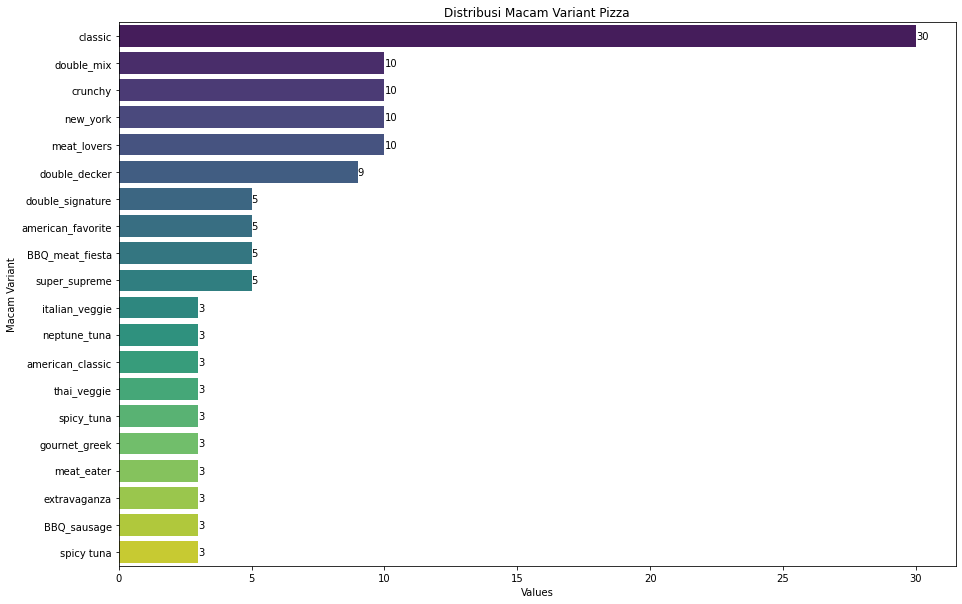

In [26]:
V = df['variant'].value_counts()
var = pd.DataFrame({'variant':V.index, 'values':V.values})
svar = var.sort_values(by='values', ascending=False)

plt.figure(figsize=(15,10))
bpsv = sns.barplot(x=svar['values'], y=svar['variant'], palette='viridis')
bpsv.bar_label(bpsv.containers[0])
plt.xlabel("Values")
plt.ylabel("Macam Variant")
plt.title("Distribusi Macam Variant Pizza");

<u> **Hasil** </u>:
<br> Terdapat 20 macam variant pizza yang terdapat pada data. Dimana jenis variant classic menjadi variant terbanyak & mendominasi jenis variant yang lainnya yakni sebesar 30 jenis variant pizza classic.

####6. Jenis ukuran pizza
Berapa macam jenis ukuran dari data pizza?

In [27]:
df['size'].nunique()

6

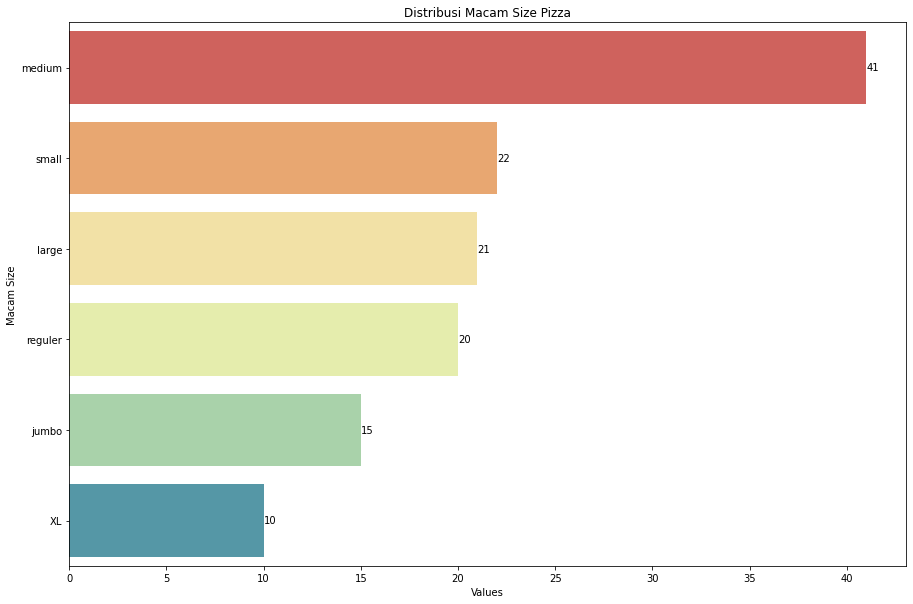

In [28]:
S = df['size'].value_counts()
si = pd.DataFrame({'size':S.index, 'values':S.values})
sortsi = si.sort_values(by='values', ascending=False)

plt.figure(figsize=(15,10))
bpsi = sns.barplot(x=sortsi['values'], y=sortsi['size'], palette='Spectral')
bpsi.bar_label(bpsi.containers[0])
plt.xlabel("Values")
plt.ylabel("Macam Size")
plt.title("Distribusi Macam Size Pizza");

<u> **Hasil** </u>:
<br> Terdapat 6 macam ukuran pizza yang terdapat pada data. Dimana jenis ukuran medium menjadi ukuran terbanyak yang ada pada pizza, yakni sebesar 41 jenis ukuran pizza medium.

####7. Permintaan extra sauce
Berapa banyak rasio perbandingan antara yang menggunakan & tidak menggunakan extra sauce?

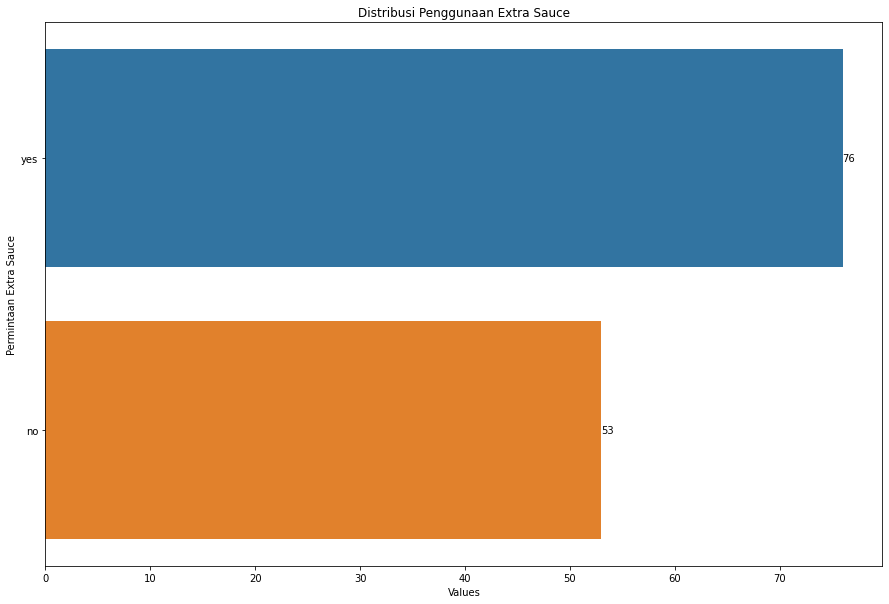

In [29]:
x1 = df['extra_sauce'].value_counts()
exsa = pd.DataFrame({'extra_sauce':x1.index, 'values':x1.values})
soxsa = exsa.sort_values(by='values', ascending=False)

plt.figure(figsize=(15,10))
bpxs = sns.barplot(x=soxsa['values'], y=soxsa['extra_sauce'])
bpxs.bar_label(bpxs.containers[0])
plt.xlabel("Values")
plt.ylabel("Permintaan Extra Sauce")
plt.title("Distribusi Penggunaan Extra Sauce");

<u> **Hasil** </u>:
<br> Lebih banyak pizza yang menggunakan extra sauce dibandingkan dengan yang tidak, yakni terdapat 76 pizza yang memakai extra sauce.

####8. Permintaan extra cheese
Berapa banyak rasio perbandingan antara yang menggunakan & tidak menggunakan extra cheese?

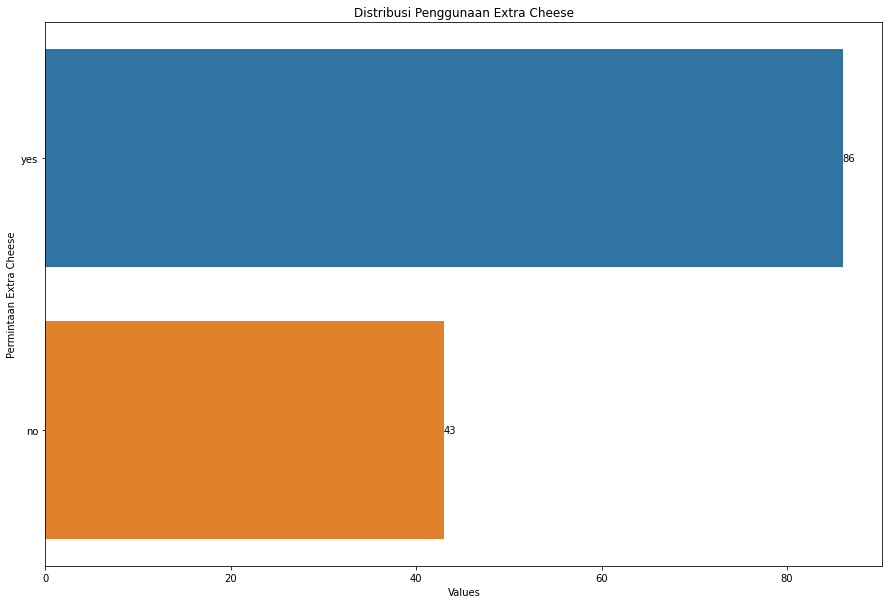

In [30]:
x2 = df['extra_cheese'].value_counts()
exce = pd.DataFrame({'extra_cheese':x2.index, 'values':x2.values})
soxce = exce.sort_values(by='values', ascending=False)

plt.figure(figsize=(15,10))
bpxc = sns.barplot(x=soxce['values'], y=soxce['extra_cheese'])
bpxc.bar_label(bpxc.containers[0])
plt.xlabel("Values")
plt.ylabel("Permintaan Extra Cheese")
plt.title("Distribusi Penggunaan Extra Cheese");

<u> **Hasil** </u>:
<br> Lebih banyak pizza yang menggunakan extra cheese dibandingkan yang tidak, yakni terdapat 86 pizza yang menggunakan extra cheese pada pizza.

####9. Permintaan extra mushrooms
Berapa banyak rasio perbandingan antara yang menggunakan & tidak menggunakan extra mushroom?

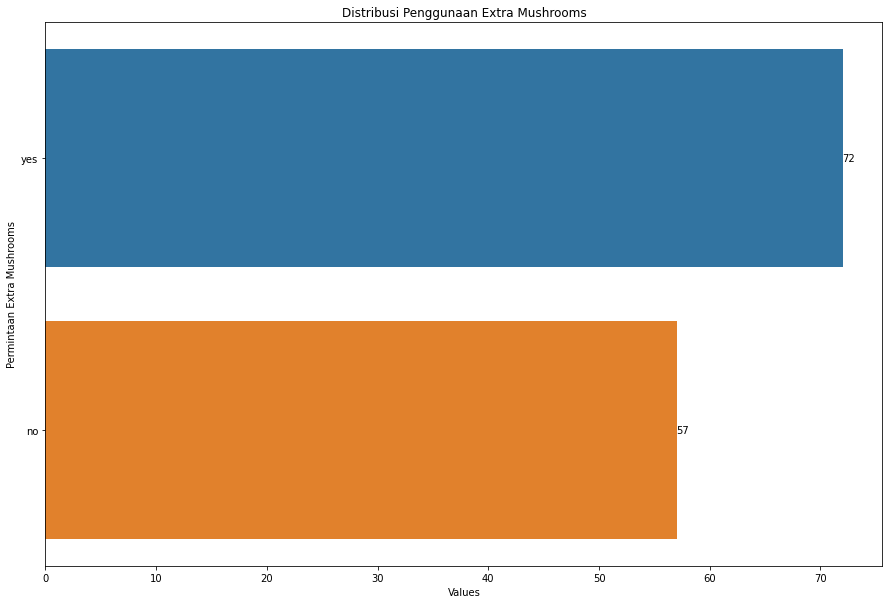

In [31]:
x3 = df['extra_mushrooms'].value_counts()
exmu = pd.DataFrame({'extra_mushrooms':x3.index, 'values':x3.values})
soxmu = exmu.sort_values(by='values', ascending=False)

plt.figure(figsize=(15,10))
bpxm = sns.barplot(x=soxmu['values'], y=soxmu['extra_mushrooms'])
bpxm.bar_label(bpxm.containers[0])
plt.xlabel("Values")
plt.ylabel("Permintaan Extra Mushrooms")
plt.title("Distribusi Penggunaan Extra Mushrooms");

<u> **Hasil** </u>:
<br> Lebih banyak pizza yang menggunakan extra mushrooms dibandingkan yang tidak, yakni terdapat 72 pizza yang menggunakan extra mushrooms pada pizza.

### DATA PRE-PROCESSING & FEATURE ENGINEERING

In [32]:
#DP = info, mis val, duplicate, uji normalitas, uji korelasi, uji linearitas
#FE = scaling, label encoder

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price_rupiah     129 non-null    int64  
 2   diameter         129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ KB


####Cek Missing Value

In [34]:
df.isna().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

####Cek Duplikasi Data

In [35]:
df[df.duplicated()]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
110,E,115000,17.0,mozzarella,new_york,XL,no,yes,yes
122,E,83000,17.0,chicken,new_york,XL,no,yes,no


In [36]:
df.drop_duplicates(inplace=True)

In [37]:
df.shape

(127, 9)

In [38]:
df[df.duplicated()]

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms


####Label Encoding
mengubah value data kategorik ke numerik

In [39]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [40]:
cat = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese', 'extra_mushrooms']

encoded_data = LabelEncoder()

for feature in cat:
        if feature in df.columns.values:
            df[feature] = encoded_data.fit_transform(df[feature])

df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,235000,22.0,2,8,1,1,1,0
1,0,198000,20.0,7,8,1,1,1,0
2,0,120000,16.0,5,8,4,1,1,1
3,0,155000,14.0,9,8,4,1,0,1
4,0,248000,18.0,4,8,1,1,0,1


####Uji Normalitas
Untuk mengetahui ke-normalitas-an distribusi variabel dependen yakni price_rupiah (& variabel independen). <br> Tingkat ke-normalitas-an pada sebuah data sangat penting, karena menjadi salah satu faktor kesuksesan hasil model prediksi.

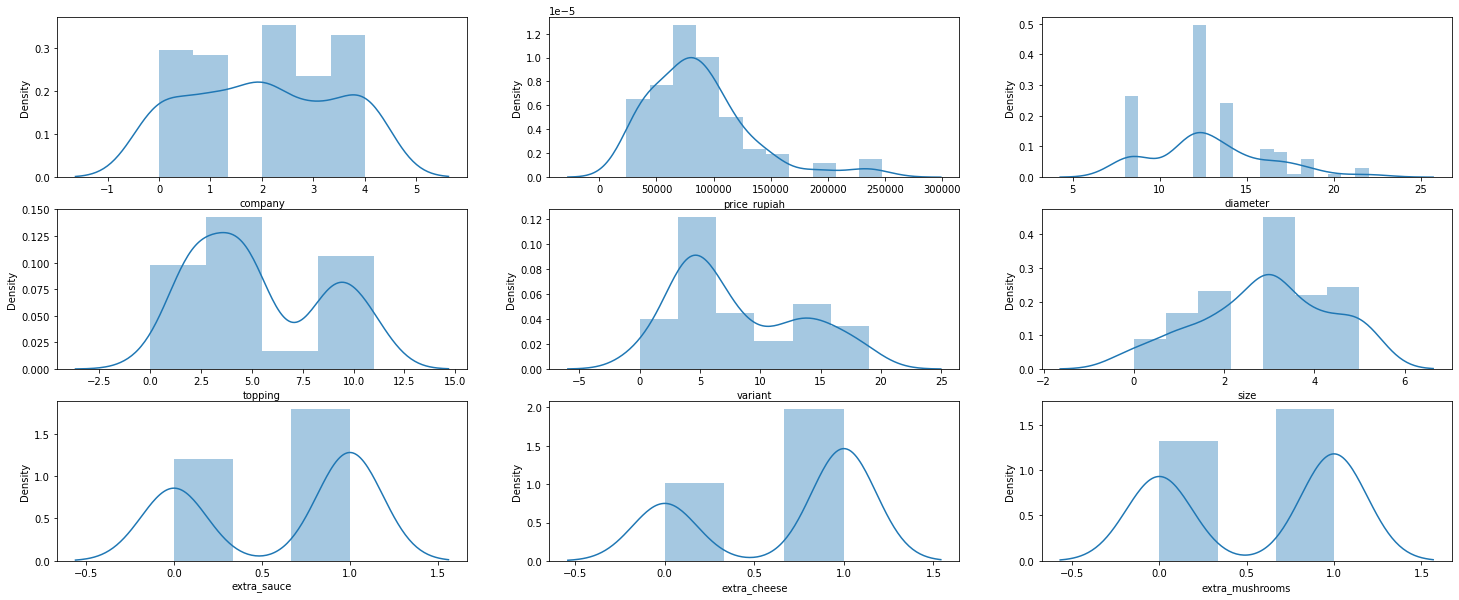

In [41]:
# Cek normalitas data dengan histogram
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3, 3, figsize=(25, 10))

sns.distplot(df['company'], ax=axes[0, 0])
sns.distplot(df['price_rupiah'], ax=axes[0, 1])
sns.distplot(df['diameter'], ax=axes[0, 2])
sns.distplot(df['topping'], ax=axes[1, 0])
sns.distplot(df['variant'], ax=axes[1, 1])
sns.distplot(df['size'], ax=axes[1, 2])
sns.distplot(df['extra_sauce'], ax=axes[2, 0])
sns.distplot(df['extra_cheese'], ax=axes[2, 1])
sns.distplot(df['extra_mushrooms'], ax=axes[2, 2])
plt.show()

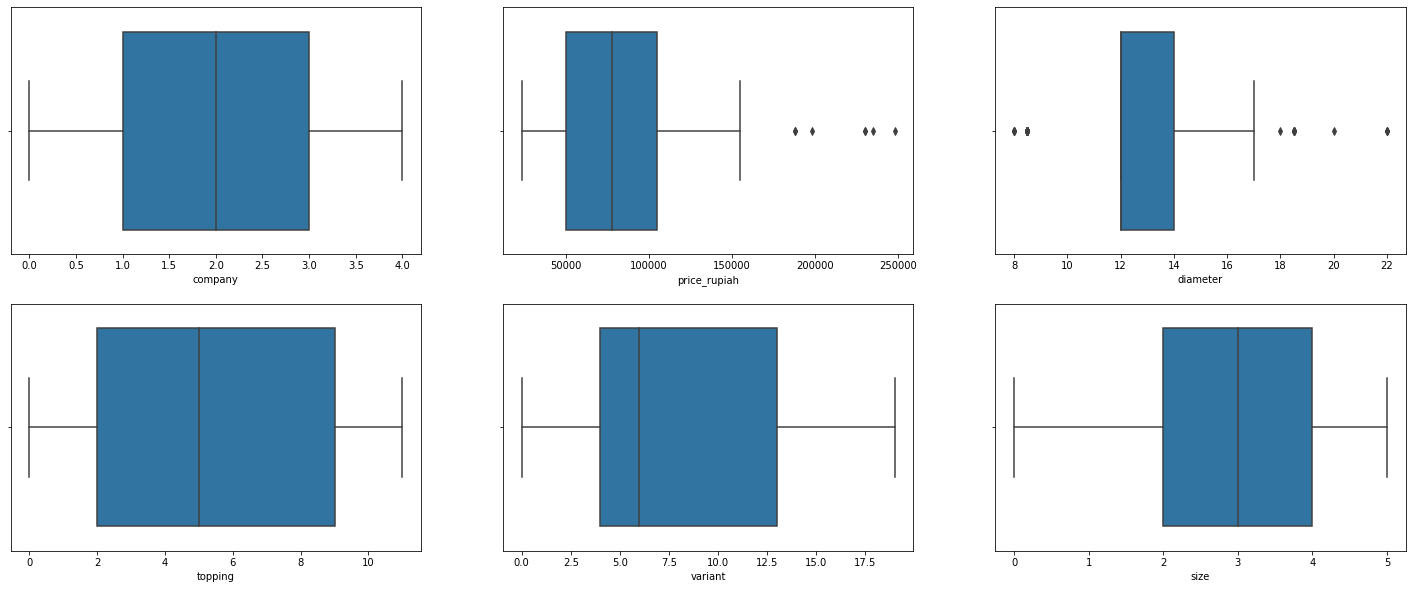

In [42]:
# Cek normalitas data dengan boxplot
fig, axes = plt.subplots(2, 3, figsize=(25, 10))

sns.boxplot(df['company'], ax=axes[0, 0])
sns.boxplot(df['price_rupiah'], ax=axes[0, 1])
sns.boxplot(df['diameter'], ax=axes[0, 2])
sns.boxplot(df['topping'], ax=axes[1, 0])
sns.boxplot(df['variant'], ax=axes[1, 1])
sns.boxplot(df['size'], ax=axes[1, 2])
# sns.boxplot(df['extra_sauce'], ax=axes[2, 0])
# sns.boxplot(df['extra_cheese'], ax=axes[2, 1])
# sns.boxplot(df['extra_mushrooms'], ax=axes[2, 2])
plt.show()

In [43]:
#posisi outlier harga
print(np.where(df['price_rupiah']>180000))

(array([ 0,  1,  4, 20, 21, 84, 85]),)


####Uji Linearitas
untuk melihat adanya hubungan yang linear antar variabel, khususnya antara variabel dependen & independen

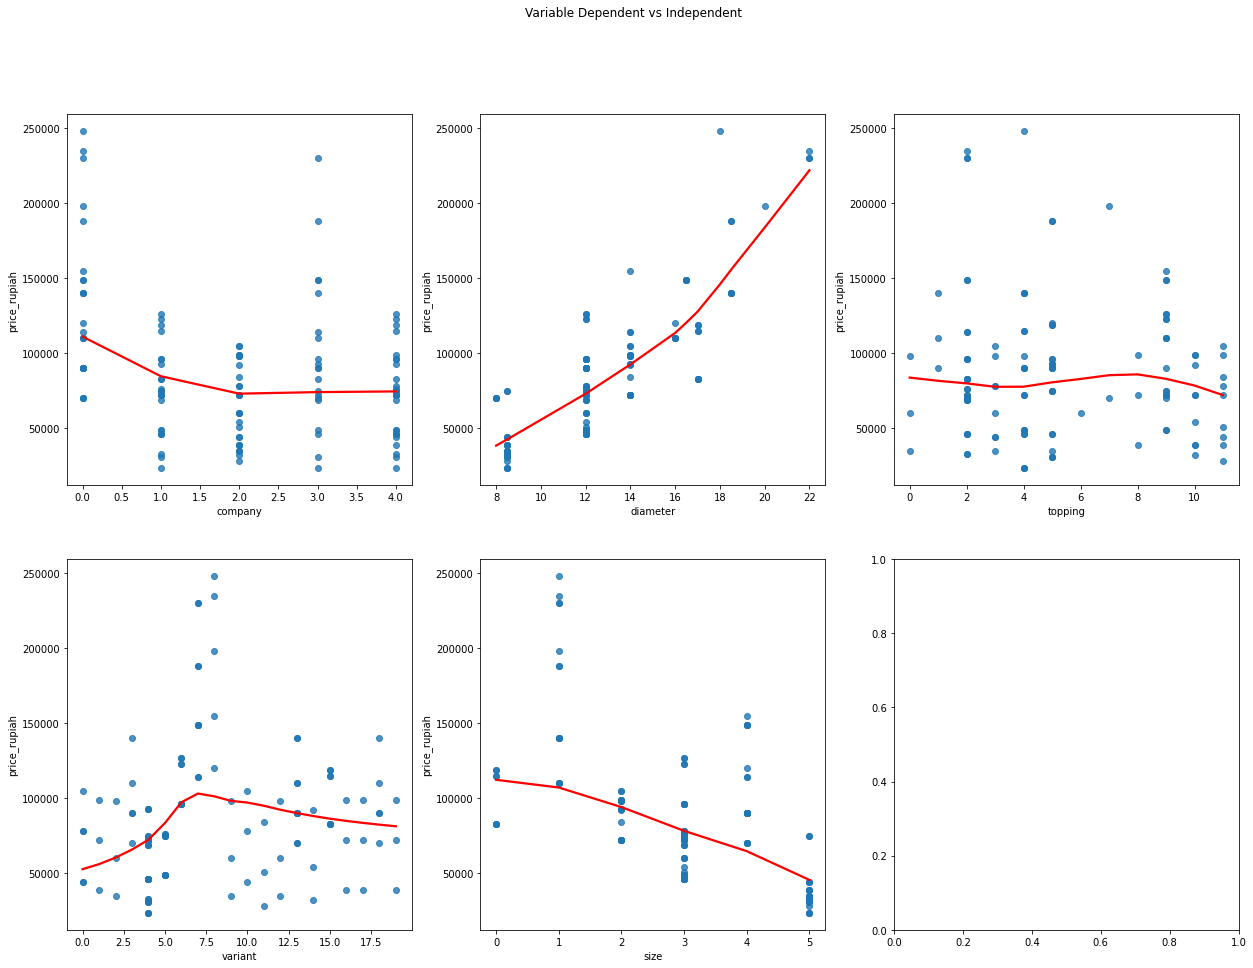

In [44]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(2, 3, figsize=(21, 15))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df['company'], y=df['price_rupiah'], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 0])
sns.regplot(x=df['diameter'], y=df['price_rupiah'], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 1])
sns.regplot(x=df['topping'], y=df['price_rupiah'], lowess=True, line_kws={'color': 'red'}, ax=axes[0, 2])
sns.regplot(x=df['variant'], y=df['price_rupiah'], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 0])
sns.regplot(x=df['size'], y=df['price_rupiah'], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 1])
# sns.regplot(x=df['extra_sauce'], y=df['price_rupiah'], lowess=True, line_kws={'color': 'red'}, ax=axes[1, 2])
# sns.regplot(x=df['extra_cheese'], y=df['price_rupiah'], lowess=True, line_kws={'color': 'red'}, ax=axes[2, 0])
# sns.regplot(x=df['extra_mushrooms'], y=df['price_rupiah'], lowess=True, line_kws={'color': 'red'}, ax=axes[2, 1])
plt.show()

####Uji Multi-Korelasi
untuk mengetahui adanya korelasi yang tinggi antar variabel, khususnya antara variabel dependen & independen

<AxesSubplot:>

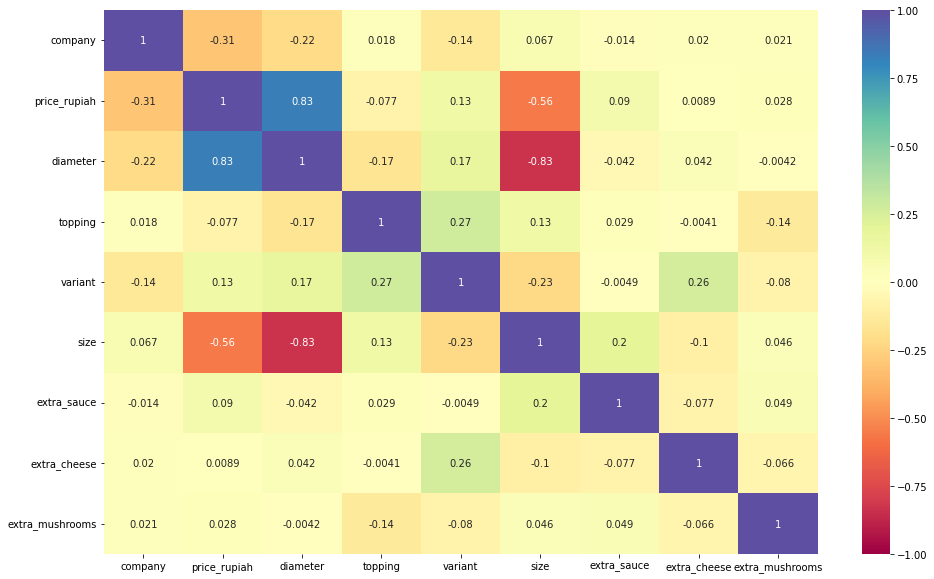

In [45]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

In [46]:
df.corr()['price_rupiah'].sort_values()

size              -0.561466
company           -0.310838
topping           -0.077101
extra_cheese       0.008903
extra_mushrooms    0.028141
extra_sauce        0.090037
variant            0.126834
diameter           0.833142
price_rupiah       1.000000
Name: price_rupiah, dtype: float64

####Scaling
untuk mengubah skala agar antar values tidak memiliki gap yang jauh

In [47]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-1.41985776,  3.30349405,  2.79942105, ...,  0.81917802,
         0.7154752 , -1.12599163],
       [-1.41985776,  2.47781822,  2.18325732, ...,  0.81917802,
         0.7154752 , -1.12599163],
       [-1.41985776,  0.73720429,  0.95092986, ...,  0.81917802,
         0.7154752 ,  0.88810607],
       ...,
       [ 1.39767248,  0.26857747,  0.33476612, ...,  0.81917802,
         0.7154752 ,  0.88810607],
       [ 1.39767248, -0.95877851, -1.35968414, ...,  0.81917802,
        -1.39767248,  0.88810607],
       [ 1.39767248, -0.20004936, -0.28139761, ..., -1.22073588,
        -1.39767248,  0.88810607]])

In [48]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,-1.419858,3.303494,2.799421,-1.040195,-0.009060,-1.337144,0.819178,0.715475,-1.125992
1,-1.419858,2.477818,2.183257,0.521327,-0.009060,-1.337144,0.819178,0.715475,-1.125992
2,-1.419858,0.737204,0.950930,-0.103282,-0.009060,0.759366,0.819178,0.715475,0.888106
3,-1.419858,1.518249,0.334766,1.145936,-0.009060,0.759366,0.819178,-1.397672,0.888106
4,-1.419858,3.593596,1.567094,-0.415586,-0.009060,-1.337144,0.819178,-1.397672,0.888106
...,...,...,...,...,...,...,...,...,...
122,1.397672,-1.070356,-1.359684,1.458240,1.525022,1.458203,0.819178,0.715475,0.888106
123,1.397672,-0.333943,-0.281398,1.458240,1.525022,0.060529,0.819178,0.715475,0.888106
124,1.397672,0.268577,0.334766,1.458240,1.525022,-0.638308,0.819178,0.715475,0.888106
125,1.397672,-0.958779,-1.359684,-0.727890,-1.543141,1.458203,0.819178,-1.397672,0.888106


### MODELING

####Train-Test-Split

In [49]:
X = scaled_df.drop("price_rupiah", axis=1).values
y = scaled_df["price_rupiah"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [50]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  88
Ukuran X test  39
Ukuran y train  88
Ukuran y test  39


####Membuat model dengan Statsmodel - OLS

In [51]:
#membuat model dengan statsmodel - Ordinary Least Square (OLS)
Input = sm.add_constant(X_train)
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     37.26
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           9.26e-24
Time:                        10:00:20   Log-Likelihood:                -63.038
No. Observations:                  88   AIC:                             144.1
Df Residuals:                      79   BIC:                             166.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.262e-05      0.056     -0.000      1.0

<u> **Hasil** </u>:

Terdapat tiga nilai p>|t| yang memiliki nilai kurang dari 0,05, yakni coef x2, x5, & x6. Artinya ketiga variabel independen tersebut yang paling mmemberikan pengaruh signifikan terhadap variabel dependen.

Nilai R-squared 0,790, artinya variabel dependen price_rupiah dapat dijelaskan oleh delapan variabel independen sebesar 79%, makin besar nilai R-squared akan semakin bagus.

### LOAD AND PREDICT NEW DATA

In [52]:
#membuat list
list_columns = []

for i in df.columns:
  if i != "price_rupiah":
    list_columns.append(i)

In [53]:
#membuat prediksi model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

In [54]:
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1
df_statsmod.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,actual_price,prediction_price
0,-1.419858,-0.281398,-0.103282,-0.967861,0.759366,0.819178,-1.397672,0.888106,0.067737,0.230026
1,-0.011093,0.334766,1.458240,1.716782,-0.638308,0.819178,0.715475,0.888106,0.268577,0.353897
2,1.397672,-0.281398,-0.727890,-1.543141,0.060529,-1.220736,-1.397672,0.888106,-0.200049,-0.611229
3,-1.419858,1.104971,-1.040195,-0.200820,0.759366,0.819178,-1.397672,-1.125992,1.384356,1.756923
4,-0.715475,-0.281398,-1.040195,-0.584340,0.060529,-1.220736,-1.397672,-1.125992,-0.244680,-0.461308


####Uji Distribusi Residual
Untuk melihat normalitas data pada residual. <br> Jika membentuk suatu pola seperti lonceng (bell curve) maka data residual dapat dikatakan berdistribusi secara normal.

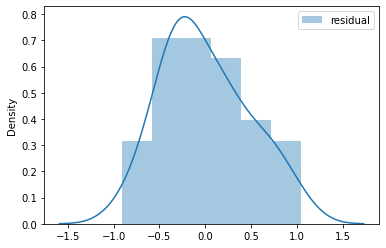

In [55]:
# Melihat distribusi residual (selisih antara nilai prediksi & faktual)
residual1 = df_statsmod['actual_price'] - df_statsmod['prediction_price']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [56]:
df_statsmod["residual"] = residual1
df_statsmod.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,actual_price,prediction_price,residual
0,-1.419858,-0.281398,-0.103282,-0.967861,0.759366,0.819178,-1.397672,0.888106,0.067737,0.230026,-0.162289
1,-0.011093,0.334766,1.458240,1.716782,-0.638308,0.819178,0.715475,0.888106,0.268577,0.353897,-0.085319
2,1.397672,-0.281398,-0.727890,-1.543141,0.060529,-1.220736,-1.397672,0.888106,-0.200049,-0.611229,0.411179
3,-1.419858,1.104971,-1.040195,-0.200820,0.759366,0.819178,-1.397672,-1.125992,1.384356,1.756923,-0.372567
4,-0.715475,-0.281398,-1.040195,-0.584340,0.060529,-1.220736,-1.397672,-1.125992,-0.244680,-0.461308,0.216627


<function matplotlib.pyplot.show>

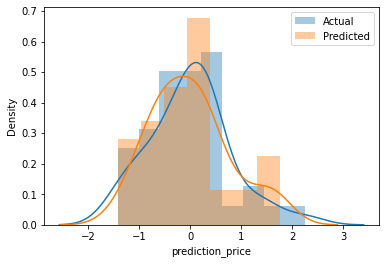

In [57]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_price'], label="Actual")
sns.distplot(df_statsmod['prediction_price'], label="Predicted")
plt.legend()
plt.show

####Uji Asumsi Non-Autokorelasi
Untuk melihat apakah terjadi korelasi antara suatu periode dengan periode sebelumnya. <br>
Mengukur dari durbin watson 1,5 < x < 2,5, jika nilai asumsi sama dengan x maka tidak ada autokorelasi

In [58]:
#uji asumsi non-autokorelasi
statsmodels.stats.stattools.durbin_watson(results.resid, axis=0)

2.1194788829104727

####Uji Homoskedastisitas
Untuk melihat apakah terdapat ketidaksamaan variance dari residual. <br>
Jika pada grafik **tidak** terjadi penyebaran secara horizontal & membuat suatu pola, maka homoskedastisitas residual terpenuhi.

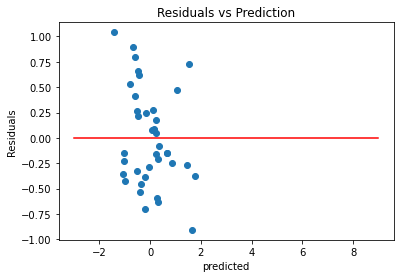

In [59]:
#uji homoskedastisitas
asm_homosk = plt.scatter(df_statsmod['prediction_price'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = sns.lineplot([-3,9],[0,0],color='red')
asm_homosk = plt.title('Residuals vs Prediction')

### EVALUATION

In [60]:
# R-square
print('R-square :', metrics.r2_score(df_statsmod['actual_price'], df_statsmod['prediction_price']))

R-square : 0.6439340351944651


In [61]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_price'], df_statsmod['prediction_price']))

MSE : 0.2188001203154404


In [62]:
#uji T-Test
t_test_const, t_test_X1, t_test_X2, t_test_X3, t_test_X4, t_test_X5, t_test_X6, t_test_X7, t_test_X8 = results.tvalues
print("T-test score const: ", t_test_const)
print("T-test score X1: ", t_test_X1)
print("T-test score X2: ", t_test_X2)
print("T-test score X3: ", t_test_X3)
print("T-test score X4: ", t_test_X4)
print("T-test score X5: ", t_test_X5)
print("T-test score X6: ", t_test_X6)
print("T-test score X7: ", t_test_X7)
print("T-test score X8: ", t_test_X8)

T-test score const:  -0.0004004843797353824
T-test score X1:  -1.6464661605246766
T-test score X2:  11.1378275289513
T-test score X3:  1.1646851733633188
T-test score X4:  -0.016673616329113083
T-test score X5:  3.5716364992386054
T-test score X6:  2.113748214903645
T-test score X7:  -0.22436122368490688
T-test score X8:  0.25285410839451655


In [63]:
p_value_const, p_value_X1, p_value_X2, p_value_X3, p_value_X4, p_value_X5, p_value_X6, p_value_X7, p_value_X8 = results.pvalues
print("P-value const: ", p_value_const)
print("P-value X1: ", p_value_X1)
print("P-value X2: ", p_value_X2)
print("P-value X3: ", p_value_X3)
print("P-value X4: ", p_value_X4)
print("P-value X5: ", p_value_X5)
print("P-value X6: ", p_value_X6)
print("P-value X7: ", p_value_X7)
print("P-value X8: ", p_value_X8)

P-value const:  0.9996814692834479
P-value X1:  0.10364054940514025
P-value X2:  7.265294068124818e-18
P-value X3:  0.24765146624831258
P-value X4:  0.9867390335862904
P-value X5:  0.0006077956834620968
P-value X6:  0.03769208016293221
P-value X7:  0.8230555027640992
P-value X8:  0.8010377384310335


<u> **Hasil** </u>:
<br> didapatkan P-Value X2, X5, X6 kurang dari 0,05 sehingga ketiga variabel independen tersebut yang paling memengaruhi variabel dependen secara signifikan.

In [64]:
#Uji kelayakan model menggunakan F-Test
f_value = results.fvalue
print("f-test score : ", f_value)

p_value = results.f_pvalue
print("P-value : ", p_value)

if p_value < 0.05:
  print("Tolak H0")
else:
  print("Terima H0")

f-test score :  37.256305563304394
P-value :  9.25667429699835e-24
Tolak H0


<u> **Hasil** </u>:
<br> P-Value kurang dari 0,05 sehingga H0 ditolak yang mana berarti bahwa model regresi antara delapan variabel independen dan variabel dependen price_rupiah layak digunakan.